Loading the libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Loading the datasets

In [26]:
df1 = pd.read_excel("Cancer Patient Data Part 1.xlsx")
df2 = pd.read_excel("Cancer Patient Data Part 2.xlsx", sheet_name = 1)

In [27]:
df1

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,P568,48,2,1,6,7,8,7,6,7,...,3,2,6,4,2,3,1,2,1,Medium
522,P569,46,2,1,6,7,5,3,2,6,...,3,3,7,7,4,8,7,7,5,Medium
523,P57,33,1,1,6,7,8,7,6,7,...,3,2,6,4,2,3,1,2,1,Medium
524,P570,52,2,1,2,3,4,2,4,3,...,4,1,2,4,6,5,4,2,5,Medium


In [28]:
df2

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P572,48,2,6,8,7,7,7,6,2,...,2,7,6,5,1,9,3,4,2,Medium
1,P573,36,2,2,1,5,3,2,3,2,...,6,7,2,5,8,1,3,2,3,Medium
2,P574,31,2,3,2,4,2,3,2,3,...,4,5,6,5,5,4,6,5,4,Medium
3,P575,38,2,1,2,3,4,2,4,3,...,4,1,2,4,6,5,4,2,5,Medium
4,P576,35,1,6,8,7,7,7,6,2,...,2,7,6,5,1,9,3,4,2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
470,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
471,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
472,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


Performing Data manipulation operations

In [29]:
df1.equals(df2)

False

In [30]:
FinalDF = pd.concat([df1,df2], axis = 0)
FinalDF

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
470,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
471,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
472,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


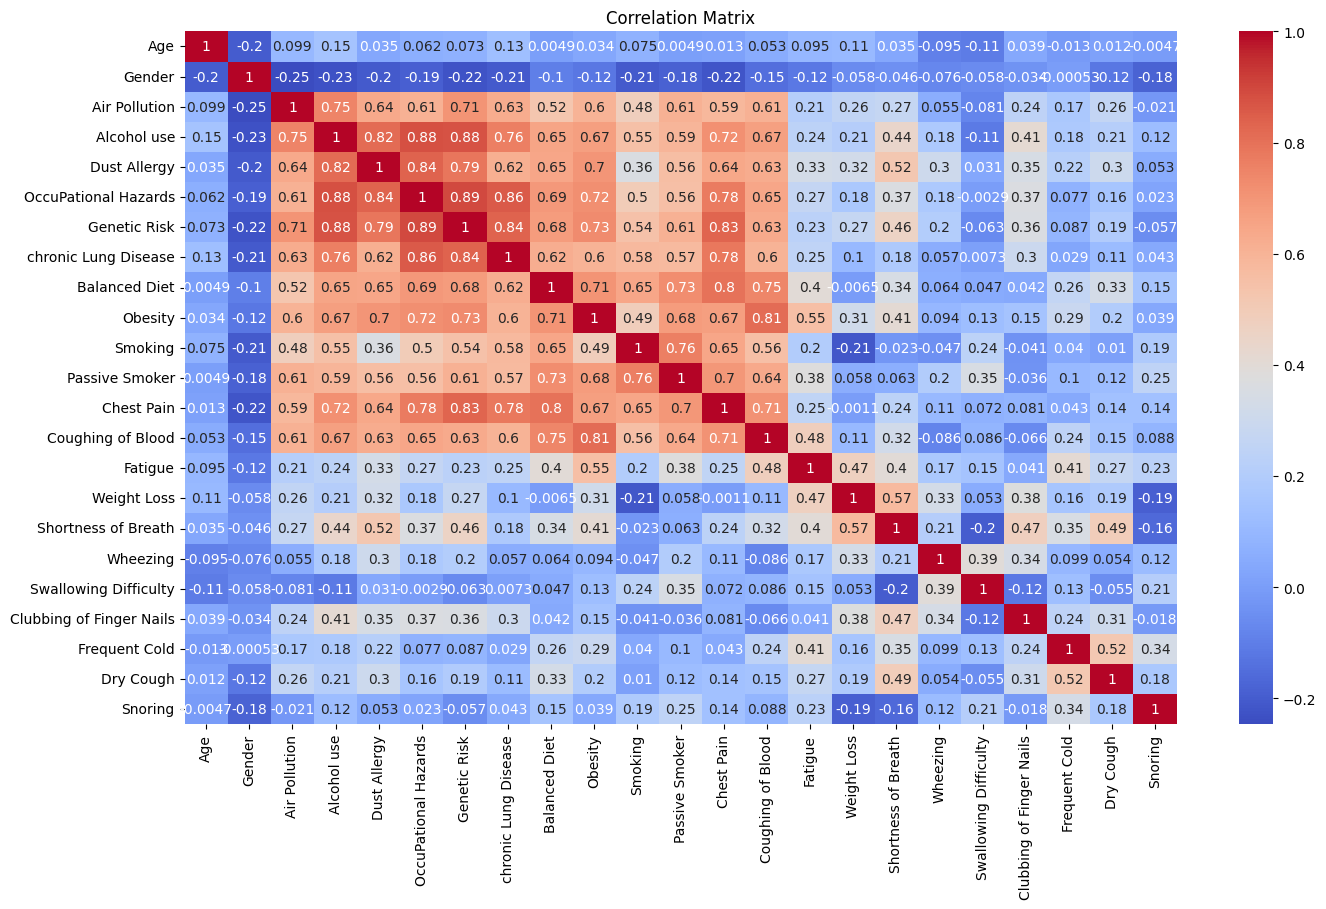

In [31]:
TempDF = FinalDF.loc[:,'Age':'Snoring']

plt.figure(figsize=(16, 9))
sns.heatmap(data = TempDF.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
FinalDF.drop(['Age','Wheezing','Swallowing Difficulty','Frequent Cold','Dry Cough','Snoring'], axis=1, inplace= True)

In [33]:
FinalDF.reset_index(inplace=True)
FinalDF.drop(['index'], axis=1, inplace= True)
FinalDF.columns.name = None

In [34]:
FinalDF

,Patient Id,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Clubbing of Finger Nails,Level
0,P1,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,1,Low
1,P10,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,2,Medium
2,P100,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,4,High
3,P1000,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,5,High
4,P101,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,2,High
996,P996,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,4,High
997,P997,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,4,High
998,P998,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,2,High


Explanatory Data Analysis

In [35]:
FinalDF.isnull().sum()

Patient Id                  0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Clubbing of Finger Nails    0
Level                       0
dtype: int64

In [36]:
FinalDF.dtypes

Patient Id                  object
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Clubbing of Finger Nails     int64
Level                       object
dtype: object

In [37]:
FinalDF.describe()

,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Clubbing of Finger Nails
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.923000
std,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.388048
min,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000
75%,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000
max,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000


In [38]:
FinalDF['Patient Id'] = FinalDF['Patient Id'].apply(lambda x: int(x[1:]))

In [39]:
LevelMapping = {'Low': 1, 'Medium': 2, 'High': 3}
FinalDF['Level'] = FinalDF['Level'].map(LevelMapping)
FinalDF['Level']

0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64

Preprocess the data

In [40]:
le = LabelEncoder()
FinalDF['Level'] = le.fit_transform(FinalDF['Level'])

In [41]:
Models = [
        ("Random Forest", RandomForestClassifier(n_estimators = 1000)),
        ("Logistic Regression", LogisticRegression(max_iter = 1000)),
        ("Naive Bayes", GaussianNB()),
        ("SVM", SVC(kernel='linear'))]

Features = ['Gender',
            'Air Pollution',
            'Alcohol use',
            'Dust Allergy',
            'Occupational Hazards',
            'Genetic Risk',
            'Chronic Lung Disease',
            'Balanced Diet',
            'Obesity',
            'Smoking',
            'Passive Smoker',
            'Chest Pain',
            'Coughing of Blood',
            'Fatigue',
            'Weight Loss',
            'Shortness of Breath',
            'Clubbing of Finger Nails']

In [42]:
def EvaluateModels(X_train, X_test, y_train, y_test):
    for name, model in Models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')
        
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        
        cm = confusion_matrix(y_test, predictions)
        
        plt.figure(figsize=(8,5))
        sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'coolwarm')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title(f'Confusion Matrix for {name}', size = 15)
        plt.show()

def PlotFeatureImportances(Model, FeatureNames, Title):
    Importances = Model.feature_importances_
    
    SortedIndices = Importances.argsort()[::-1]
    SortedImportances = Importances[SortedIndices]
    SortedFeatureNames = [FeatureNames[i] for i in SortedIndices]

    plt.figure(figsize=(10, 8))
    plt.barh(range(len(SortedFeatureNames)), SortedImportances, align='center')
    plt.yticks(range(len(SortedFeatureNames)), SortedFeatureNames)
    plt.xlabel('Feature Importance')
    plt.title(Title)
    plt.grid(True, linestyle = '--', alpha = 0.7)
    plt.show()

# Problem Statement 1 : Risk Level of Cancer

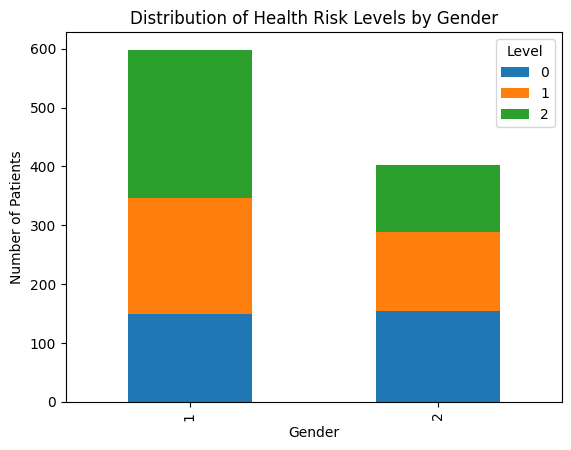

In [43]:
GenderCounts = FinalDF.groupby(['Gender', 'Level']).size().unstack()
GenderCounts.plot(kind = 'bar', stacked = True)

plt.title('Distribution of Health Risk Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

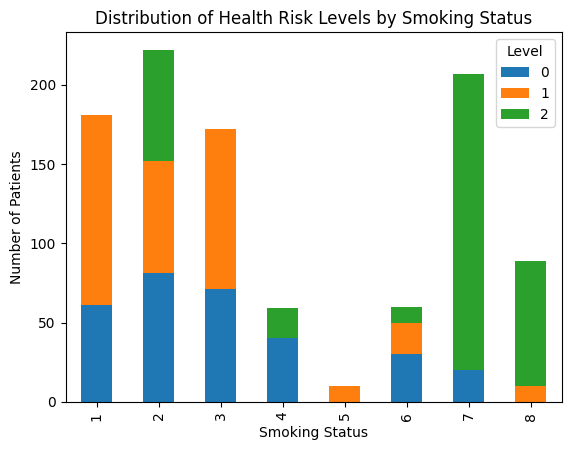

In [44]:
SmokingCounts = FinalDF.groupby(['Smoking', 'Level']).size().unstack()
SmokingCounts.plot(kind = 'bar', stacked = True)

plt.title('Distribution of Health Risk Levels by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Patients')
plt.show()

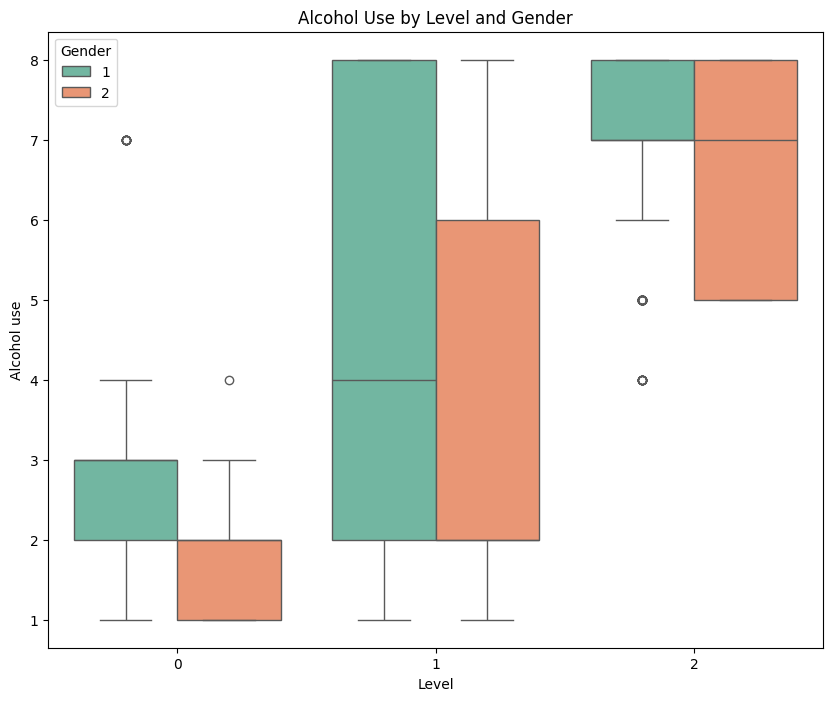

In [45]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Level', y = 'Alcohol use', hue = 'Gender', data = FinalDF, palette = 'Set2')
plt.title('Alcohol Use by Level and Gender')
plt.xlabel('Level')
plt.ylabel('Alcohol use')
plt.legend(title = 'Gender')
plt.show()

Scatter plot of Air Pollution vs. Shortness of Breath

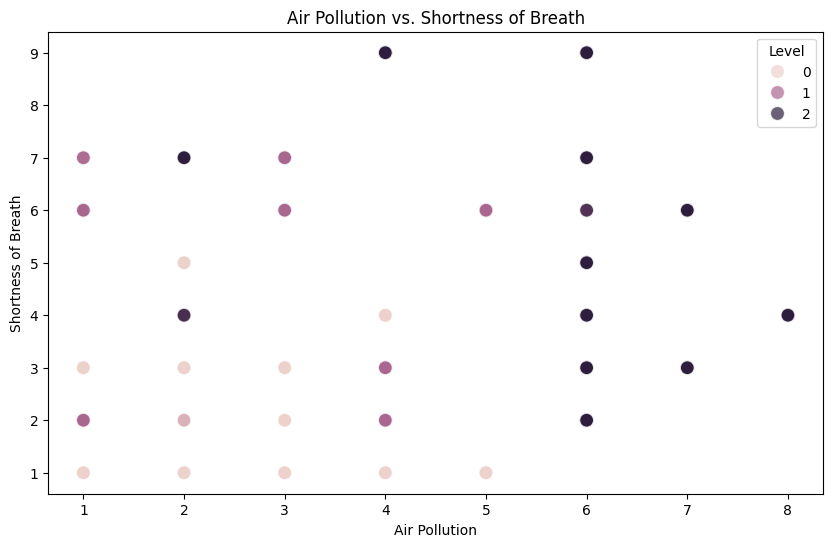

In [46]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = FinalDF, x = 'Air Pollution', y = 'Shortness of Breath', hue = 'Level', alpha = 0.7, s = 100)
plt.title('Air Pollution vs. Shortness of Breath')
plt.xlabel('Air Pollution')
plt.ylabel('Shortness of Breath')
plt.show()

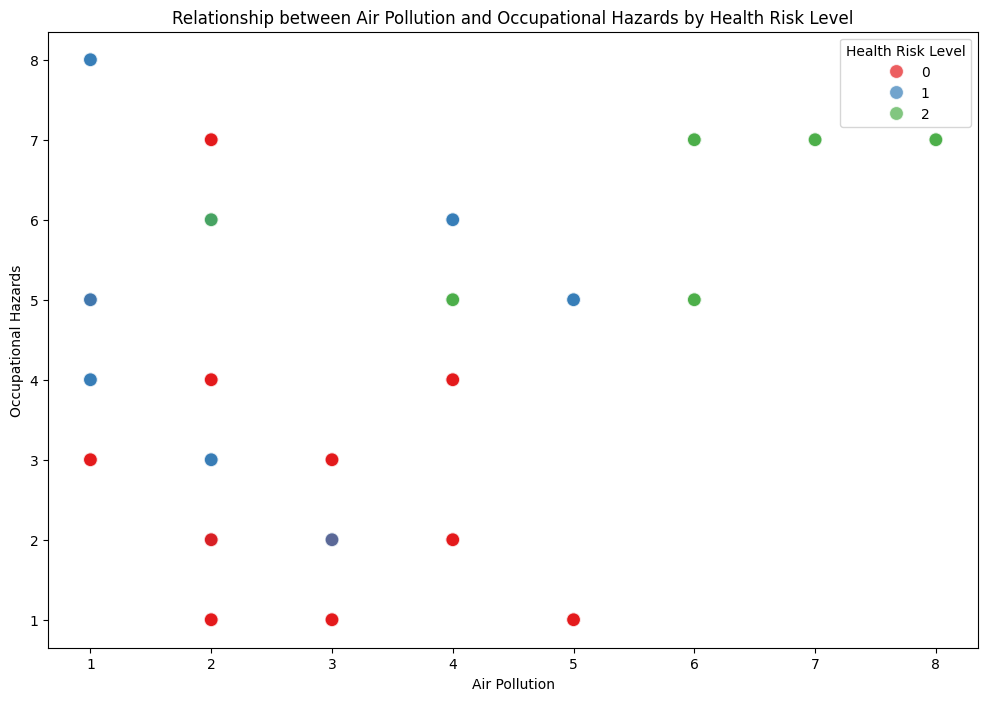

In [47]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = FinalDF, x = 'Air Pollution', y = 'OccuPational Hazards', hue = 'Level', palette = 'Set1', alpha = 0.7, s = 100)
plt.title('Relationship between Air Pollution and Occupational Hazards by Health Risk Level')
plt.xlabel('Air Pollution')
plt.ylabel('Occupational Hazards')
plt.legend(title = 'Health Risk Level')
plt.show()

In [48]:
X1 = FinalDF[['Gender',
            'Air Pollution', 
            'Alcohol use', 
            'Dust Allergy' , 
            'OccuPational Hazards', 
            'Balanced Diet', 
            'Obesity', 
            'Smoking', 
            'Weight Loss',
            'Shortness of Breath']]

y1 = FinalDF['Level']

In [49]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


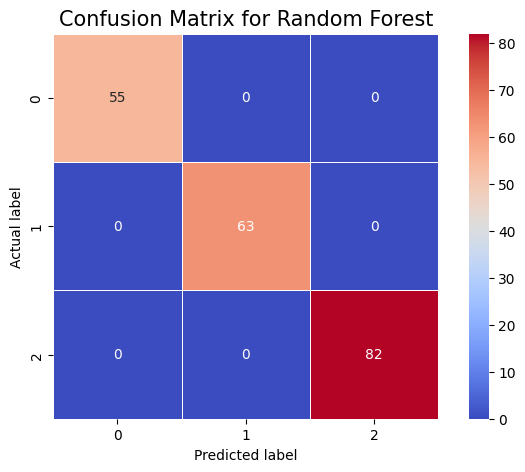

Model: Logistic Regression
Accuracy: 0.93
Precision: 0.9313559322033897
Recall: 0.93
F1 Score: 0.930080529191832


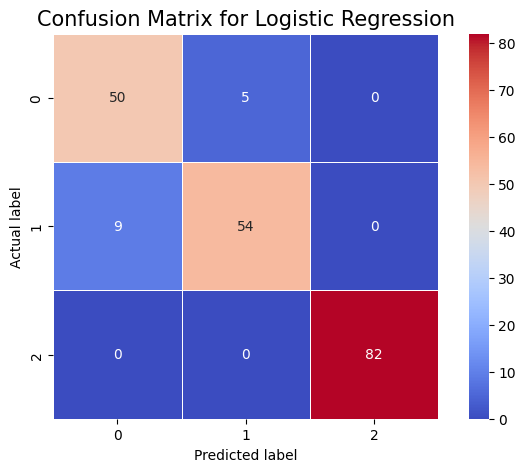

Model: Naive Bayes
Accuracy: 0.84
Precision: 0.8373929608127721
Recall: 0.84
F1 Score: 0.8359132777385717


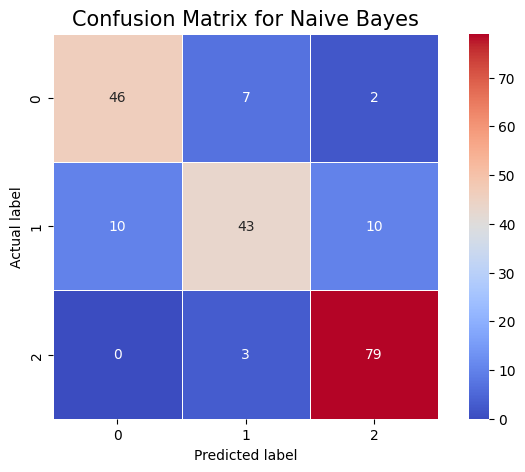

Model: SVM
Accuracy: 0.94
Precision: 0.9428472821397755
Recall: 0.94
F1 Score: 0.940051724137931


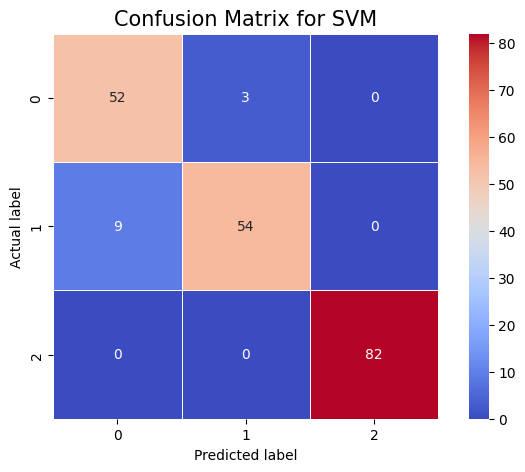

In [50]:
EvaluateModels(X1_train, X1_test, y1_train, y1_test)

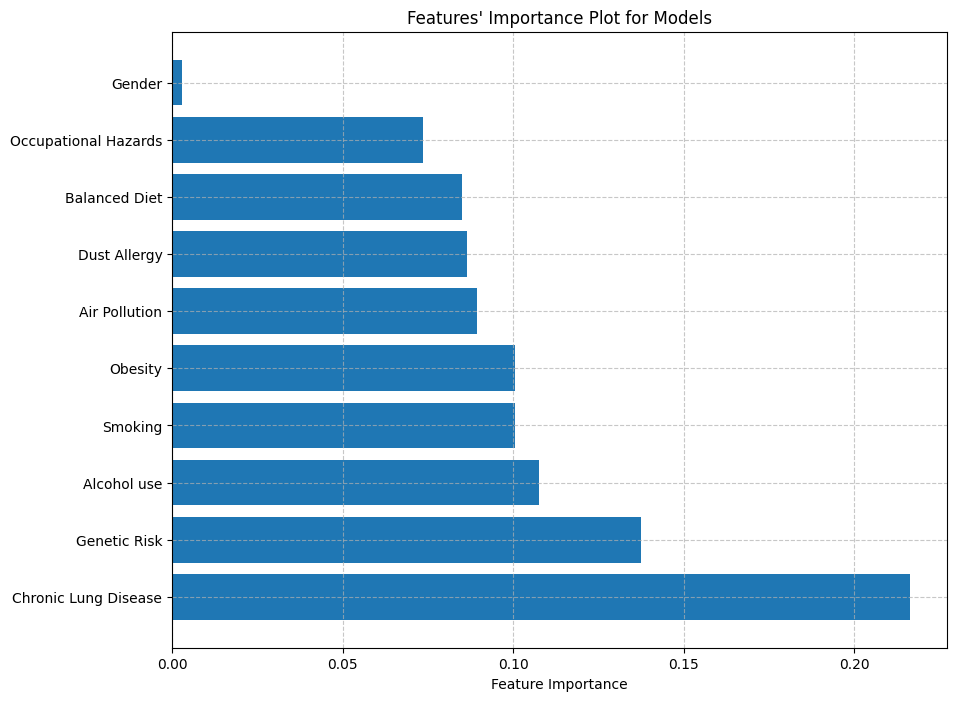

Random Forest Model Accuracy: 1.0


In [51]:
RFModel = Models[0][1]
RFModel.fit(X1_train, y1_train)

PlotFeatureImportances(RFModel, Features, "Features' Importance Plot for Models")

predictions = RFModel.predict(X1_test)
accuracy = accuracy_score(y1_test, predictions)
print(f"Random Forest Model Accuracy: {accuracy}")

# Problem Statement 2 : Chronic Lung Disease

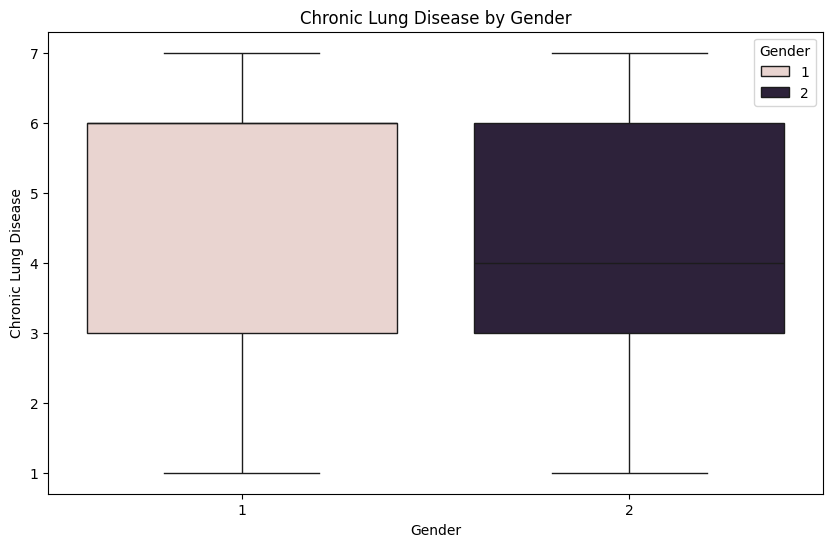

In [54]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = FinalDF, x = 'Gender', y = 'chronic Lung Disease', hue = 'Gender')
plt.title('Chronic Lung Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Chronic Lung Disease')
plt.legend(title = 'Gender')
plt.show()

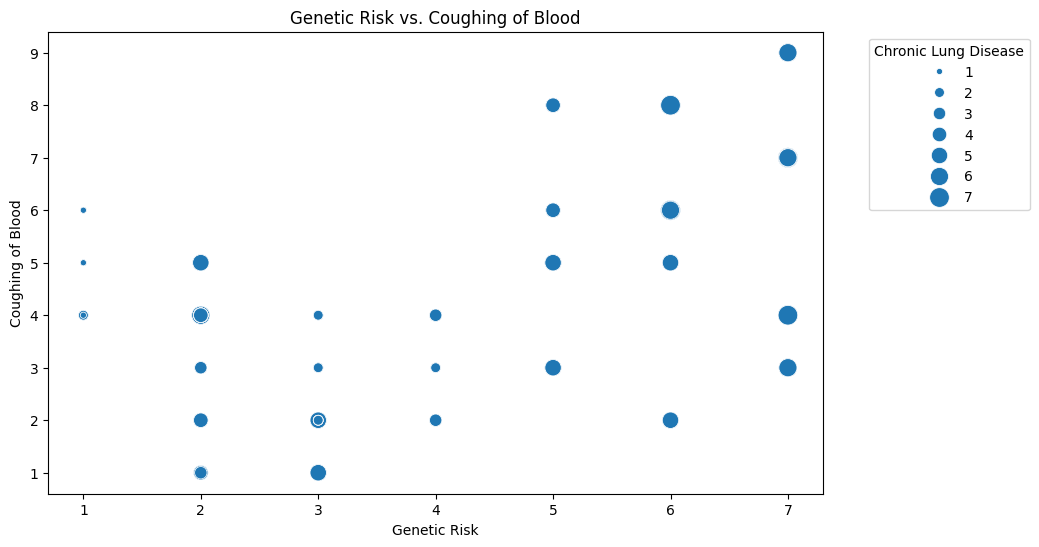

In [55]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = FinalDF, x = 'Genetic Risk', y = 'Coughing of Blood', size = 'chronic Lung Disease', sizes = (20, 200))
plt.title('Genetic Risk vs. Coughing of Blood')
plt.xlabel('Genetic Risk')
plt.ylabel('Coughing of Blood')
plt.legend(title = 'Chronic Lung Disease', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [52]:
X2 = FinalDF[['Air Pollution',
            'Alcohol use',
            'Dust Allergy',
            'OccuPational Hazards',
            'Genetic Risk', 
            'Chest Pain',
            'Balanced Diet',
            'Coughing of Blood']]

y2 = FinalDF['chronic Lung Disease']

In [53]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


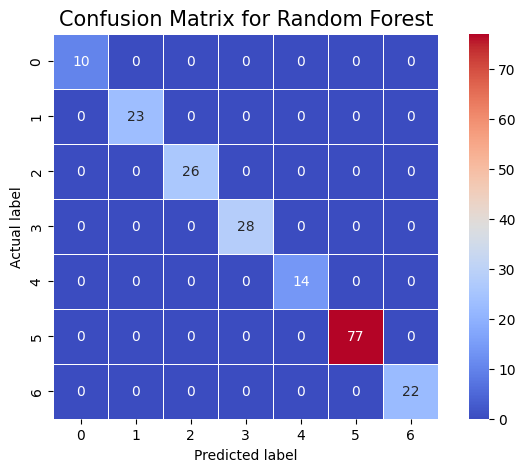

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.88
Precision: 0.8826141414141414
Recall: 0.88
F1 Score: 0.8773576113105542


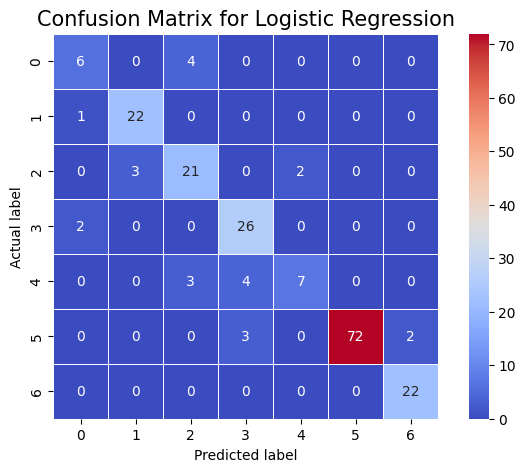

Model: Naive Bayes
Accuracy: 0.52
Precision: 0.6887297901260166
Recall: 0.52
F1 Score: 0.5092461510238064


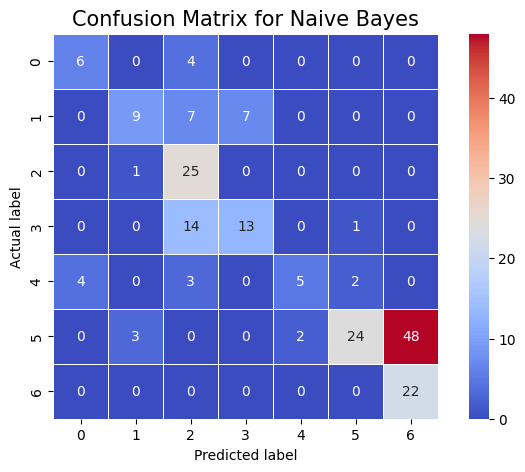

Model: SVM
Accuracy: 0.965
Precision: 0.9677259740259739
Recall: 0.965
F1 Score: 0.9648208994708994


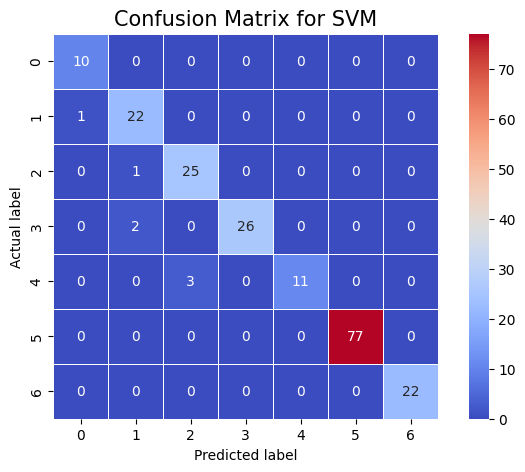

In [56]:
EvaluateModels(X2_train, X2_test, y2_train, y2_test)

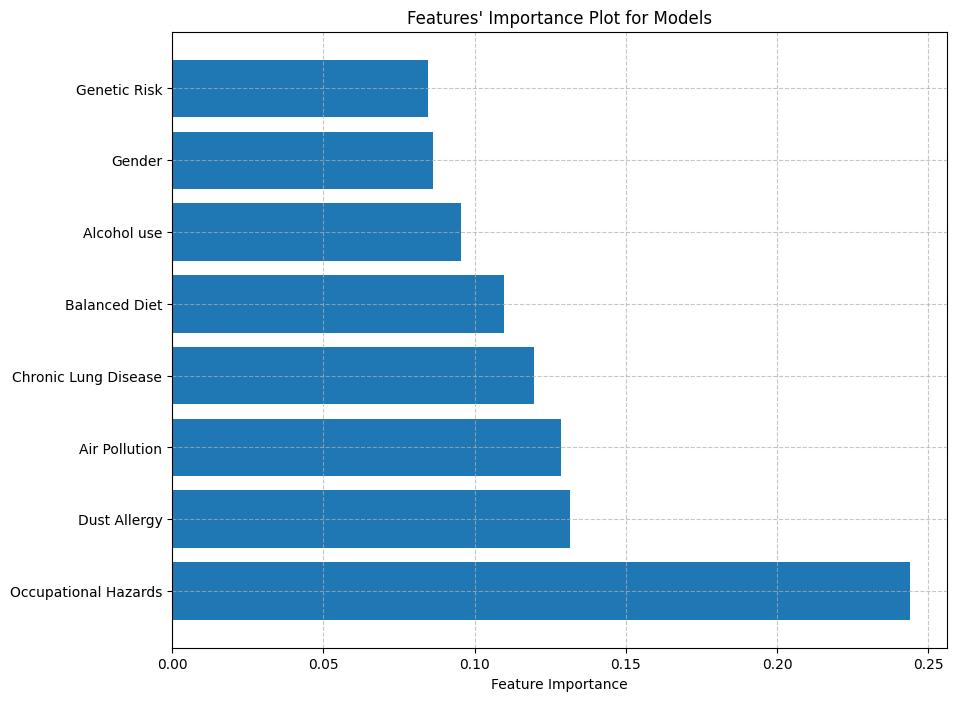

Random Forest Model Accuracy: 1.0


In [57]:
RFModel = Models[0][1]
RFModel.fit(X2_train, y2_train)

PlotFeatureImportances(RFModel, Features, "Features' Importance Plot for Models")

predictions = RFModel.predict(X2_test)
accuracy = accuracy_score(y2_test, predictions)
print(f"Random Forest Model Accuracy: {accuracy}")